# Parallelisation

## Setup

In [20]:
import json
import sys
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
# from datasketch import MinHash, MinHashLSH

plt.rcParams["figure.figsize"] = [20, 10]

def createGraph(paths, figureTitle, isSave = False, figureName = ""):
    threadCount = 1
    dataToDF = []
    for path in paths:
        dataToDF.append({'time': (json.load(open(path, encoding="utf8")))["elapsedTime"], 'threadCount': threadCount})
        threadCount = threadCount + 1

    df = DataFrame(dataToDF)

    # df = DataFrame([thread1, thread2])
    plot = df.plot(x="threadCount", y="time", legend=False, title=figureTitle, ylabel="Time", xlabel="Isolate Count", marker="o")
    if isSave:
        plot.get_figure().savefig(figureName)

## Image tagging

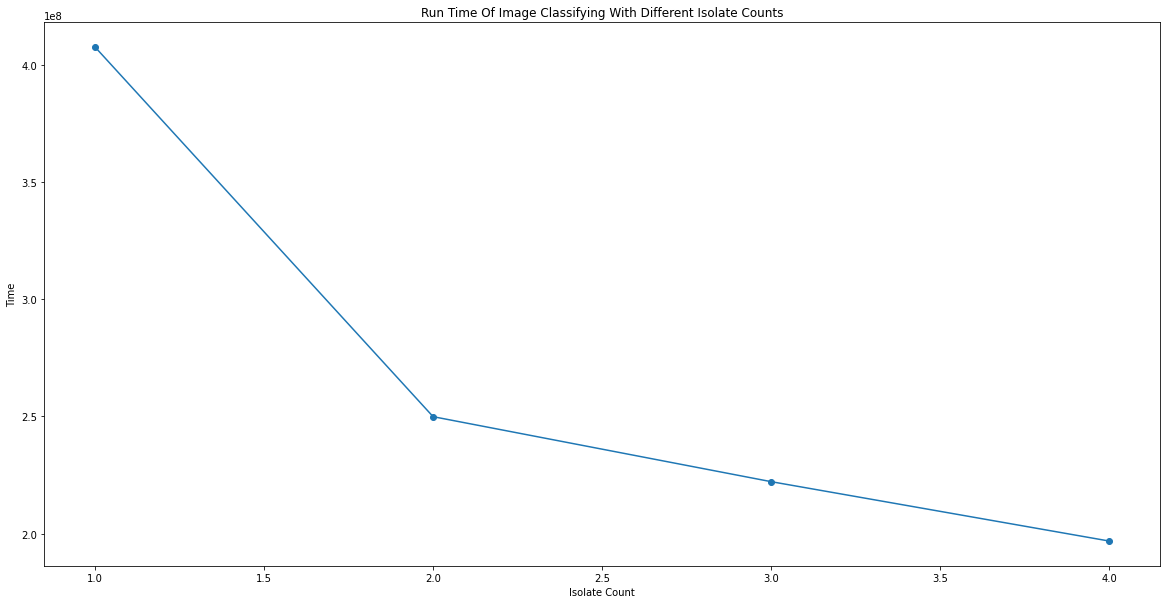

In [22]:
# Insta used here
# createGraph("data/1650274922103862-Tagging of images only total.json", "data/1650274989336800-Tagging of images only total.json", "data/1650275074235943-Tagging of images only total.json", "data/1650275157008042-Tagging of images only total.json")

imagesData = ["data/image/is365-t1-Tagging of images only total.json", \
    "data/image/is365-t2-Tagging of images only total.json",
    "data/image/is365-t3-Tagging of images only total.json",
    "data/image/is365-t4-Tagging of images only total.json",]

# createGraph(imagesData, "Run Time Of Image Classifying With Different Isolate Counts")
createGraph(imagesData, "Run Time Of Image Classifying With Different Isolate Counts", isSave = True, figureName = "Parallel Image Classify.jpg")

## Parser

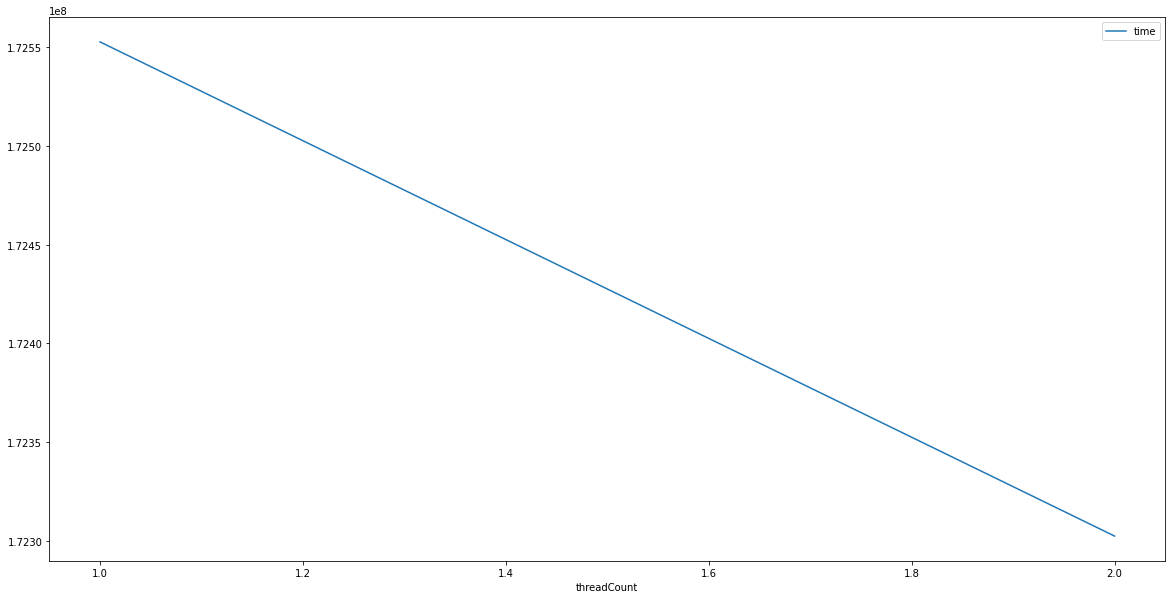

In [11]:
# Facebook used here
fbData = ["data/parser/fb-t1-Extraction and parsing.json", \
    "data/parser/fb-t2-Extraction and parsing.json"]

fsData = ["data/parser/fs-t1-Extraction and parsing.json", \
    "data/parser/fs-t2-Extraction and parsing.json", \
    "data/parser/fs-t3-Extraction and parsing.json", \
    "data/parser/fs-t4-Extraction and parsing.json"]


dataToAdd = [fbData, fsData]

createGraph(fbData)